In [1]:
import numpy as np
#import matplotlib as mpl
#mpl.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
from math import sqrt

In [6]:
lines = !! grep -e "--->" example-stdout-weather.txt
llgp = [line.split() for line in lines]
llgp, last, cogp = llgp[:-2], llgp[-2], llgp[-1]
nruns = 3
ms = [int(line[4]) for line in llgp]
ms = ms
times = [float(line[6]) for line in llgp]
se_times = [float(line[8][:-1]) / sqrt(nruns) for line in llgp]
smses = [float(line[10]) for line in llgp]
nlpds = [float(line[14]) for line in llgp]
se_nlpds = [float(line[16][:-1]) / sqrt(nruns) for line in llgp]

In [7]:
smses

[0.0797, 0.0797, 0.0797, 0.0797, 0.0797, 0.0797, 0.0797]

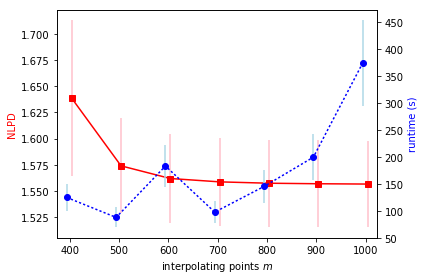

In [8]:
fig, ax1 = plt.subplots()
ax1.errorbar(ms, nlpds, yerr=se_nlpds, c='r', marker='s', ecolor='pink')
ax1.set_ylabel('NLPD', color='r')
ax1.set_xlabel(r'interpolating points $m$')
ax2 = ax1.twinx()
jittered_ms = [m - 10 for m in ms]
ax2.errorbar(jittered_ms, times, yerr=se_times, c='b', marker='o', ls=':', ecolor='lightblue')
ax2.set_ylabel('runtime (s)', color='b')
ax2.set_xlim([min(ms) - 30, max(ms) + 20])

fig.tight_layout()
plt.savefig('m_time_nlpd.eps', format='eps', bbox_inches='tight')
plt.show()

In [10]:
' '.join(last)

'---> llgp slfm m 3951 time 2065.6674 ( 761.3144) smse 0.0797 ( 0.0125) nlpd 1.5563 ( 0.0717)'

In [11]:
' '.join(cogp)

'---> cogp m 200 time 1404.295186666666 smse 0.081216155870807 nlpd 99.74857408085514'